# ----------------------------------------------------------------------------------------------------786
# Name: Muhammad Sherjeel Akhtar
# Roll No: 20p-0101
# Lab Task: 01
# Subject: Artificial Intelligence Lab
# Section: BCS-6C
# Submitted To Respected Ma'am: Miss Hurmat Hidayat
# -------------------------------------------------------------------------------------------------------------

# Load The Dataset

In [38]:
import pandas as pd  

# load the dataset
df = pd.read_csv("Cust_Segmentation.csv")

print(df.head())  


   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


# Drop Duplicates From Dataset

In [23]:
# Drop duplicates from Dataset
df.drop_duplicates(inplace=True)

# Drop Missing Values 

In [28]:
# Drop missing values 
df.dropna(inplace=True)

print(df.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


# Convert Non-Numeric Values To NaN


In [29]:
# Convert non-numeric values to NaN
df['Address'] = pd.to_numeric(df['Address'], errors='coerce')

# Initialize The Scaler

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

/home/spoofy/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/spoofy/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/spoofy/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Print The First 5 Rows Of The Scaled Dataset

In [39]:
# Print the first 5 rows of the scaled dataset
print(df_scaled.head())


   Customer Id       Age       Edu  Years Employed    Income  Card Debt  \
0    -1.766243  0.768304  0.298793       -0.359007 -0.723102  -0.675699   
1    -1.762130  1.519090 -0.779325        2.647029  1.478707   1.431421   
2    -1.758018 -0.232744  0.298793        0.242201  0.309845   2.154119   
3    -1.753905 -0.733267  0.298793       -0.659610 -0.723102  -0.412427   
4    -1.749792  1.519090 -0.779325        3.398538  5.637681   3.665215   

   Other Debt  Defaulted  Address  DebtIncomeRatio  
0   -0.604284  -0.594950      NaN        -0.580528  
1    1.570620  -0.594950      NaN         0.372222  
2    0.835201   1.680814      NaN         1.559495  
3   -0.773833  -0.594950      NaN        -0.580528  
4    1.780653  -0.594950      NaN        -0.448609  


# Select The Relevant Features

In [33]:
# Select the relevant features

X = df_scaled[['Income', 'Years Employed']]
X.head()


,Income,Years Employed
0,-0.723102,-0.359007
1,1.478707,2.647029
2,0.309845,0.242201
3,-0.723102,-0.659610
4,5.637681,3.398538


# Fit The KMeans Model With Various K Values


In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit the KMeans model with various k values

KCS = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    KCS.append(kmeans.inertia_)


/home/spoofy/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/spoofy/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/spoofy/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/spoofy/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/spoofy/.local/lib/python3.8/si

# Plot The Elbow Graph

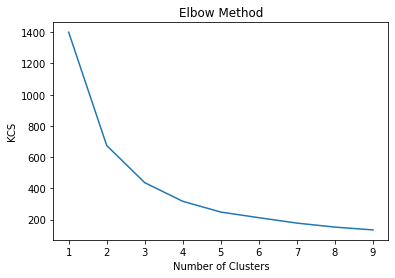

In [35]:
# Plot the elbow graph

plt.plot(range(1, 10), KCS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('KCS')
plt.show()

# Fit The KMeans Model With K=5

In [36]:
# Fit the KMeans model with k=5

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_


/home/spoofy/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Add The Cluster Labels To The Dataframe

In [37]:
# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_


# Visualize The Clusters

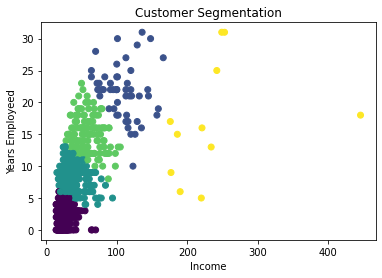

In [20]:
# Visualize the clusters
plt.scatter(df['Income'], df['Years Employed'], c=df['cluster'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Years Employeed')
plt.title('Customer Segmentation')
plt.show()


# Question: 1 When should we split the data into training and testing sets when using K-means clustering,  and why?

## Answer: 
### Splitting the data into training and testing sets is not necessary for K-means clustering because it is an unsupervised learning algorithm, meaning it does not require labeled data to learn from. Instead, K-means clustering identifies patterns and structure within the data itself based on the input features and clusters the data into groups. we could split the data into training and testing sets if we want to evaluate the performance of the K-means clustering algorithm in predicting new, unseen data.
    
    


    

# Question: 2 Why do we need to scale the features before performing K-means clustering?

## Answer: 
### Scaling the features is important for K-means clustering to ensure that the distance calculation and optimization process are unbiased and accurate and to help interpret the clustering results.

# FIN!!